# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [7]:
# your code here

fitbit = pd.read_csv('C:/Users/luiso/IRONHACK/5.2-lab_matplotlib_seaborn/data/Fitbit2.csv')

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

<Axes: xlabel='Months_encoded', ylabel='Steps'>

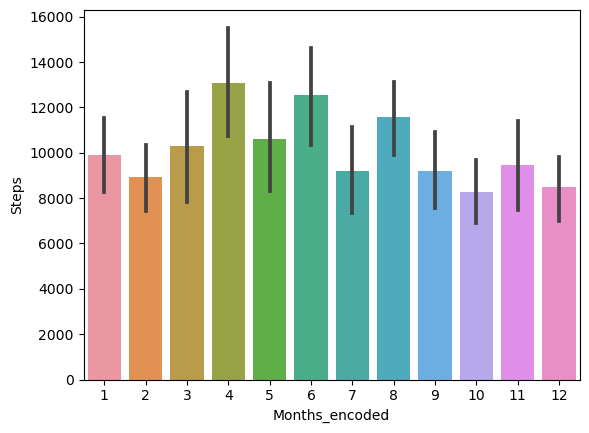

In [12]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here


# ahora con seaborn y la media de los pasos por mes

sns.barplot(x='Months_encoded', y='Steps', data=fitbit, estimator=np.mean)



<Axes: xlabel='Work_or_Weekend', ylabel='Steps'>

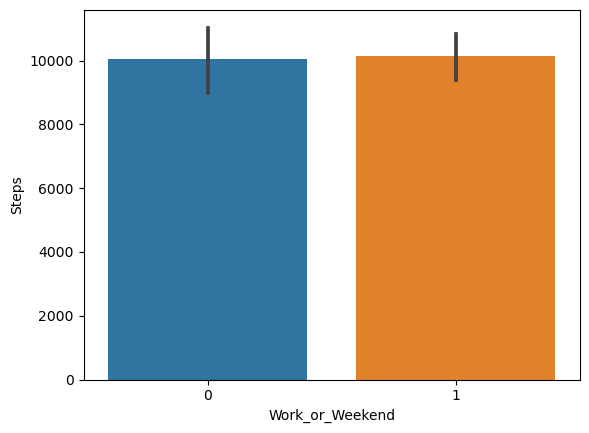

In [13]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here

sns.barplot(x='Work_or_Weekend', y='Steps', data=fitbit, estimator=np.mean)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here

# hacer un loop para hacer un plot de las variables Minutes sedentary, Minutes Lightly Active, Minutes Very Active con steps



## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [14]:
# your code here

titanic = pd.read_csv('C:/Users/luiso/IRONHACK/5.2-lab_matplotlib_seaborn/data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [15]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [16]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include=['int64', 'float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include=['object']).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [22]:
# your code here

plt.style.use('classic')

plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 51.,  21.,  25.,  53., 123., 203., 178., 169., 150.,  70.,  68.,
         68.,  47.,  28.,  21.,  21.,   5.,   5.,   2.,   1.]),
 array([ 0.17  ,  4.1615,  8.153 , 12.1445, 16.136 , 20.1275, 24.119 ,
        28.1105, 32.102 , 36.0935, 40.085 , 44.0765, 48.068 , 52.0595,
        56.051 , 60.0425, 64.034 , 68.0255, 72.017 , 76.0085, 80.    ]),
 <BarContainer object of 20 artists>)

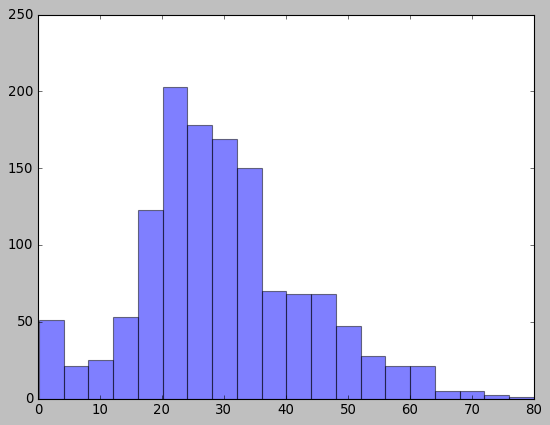

In [25]:
# your code here

# grafico de barras para la columna age en el eje x y la frecuencia en el eje y

plt.hist(titanic['Age'], bins=20, color='blue', alpha=0.5)



#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [27]:
# your code here

# grafico de barras para la columna age en el eje x y la frecuencia en el eje "y" con subplots

fig, ax = plt.subplots(1, 2, 3, figsize=(12, 6))


TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

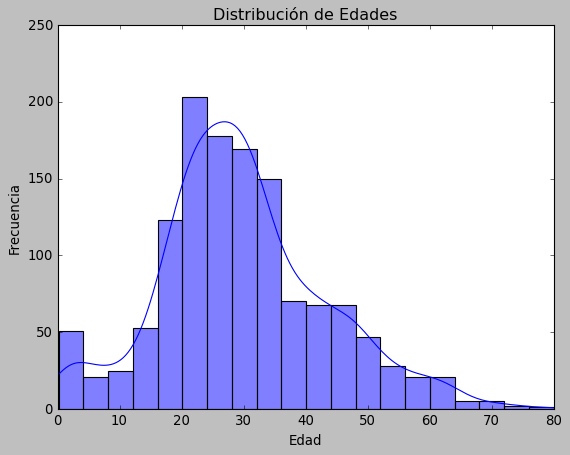

In [29]:
# your code here
# Crear un histograma de la columna 'age' utilizando Seaborn
sns.histplot(data=titanic, x='Age', kde=True, bins=20)  # kde=True agrega una estimación de la densidad

# Personaliza el título y etiquetas de los ejes
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Muestra el histograma
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

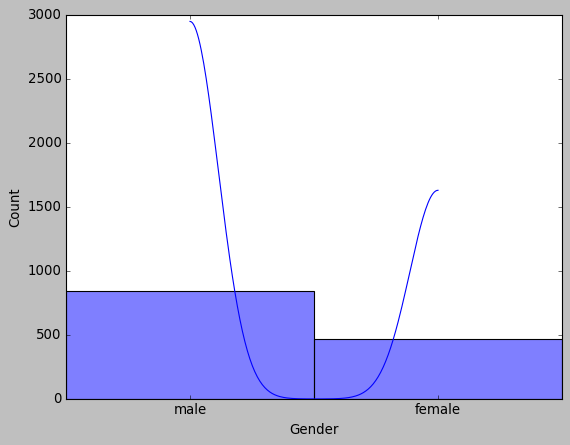

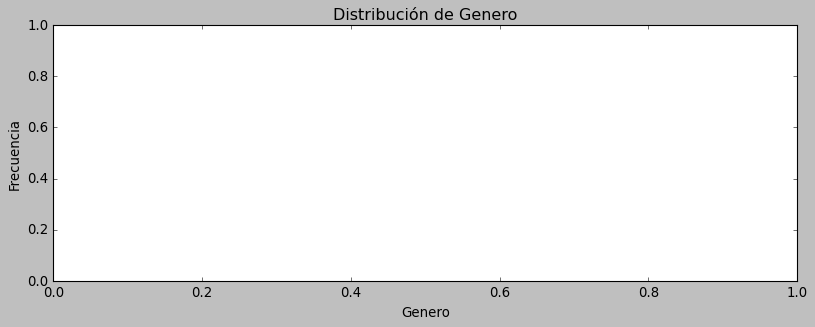

In [33]:
# Method 2 - seaborn
# your code here

# your code here
# Crear un histograma de la columna 'age' utilizando Seaborn
sns.histplot(data=titanic, x='Gender', kde=True, bins=20)  # kde=True agrega una estimación de la densidad

# tamaño de la figura

plt.figure(figsize=(12, 4))

# Personaliza el título y etiquetas de los ejes
plt.title("Distribución de Genero")
plt.xlabel("Genero")
plt.ylabel("Frecuencia")

# Muestra el histograma
plt.show()

#### Use the right plot to visualize the column `Pclass`.

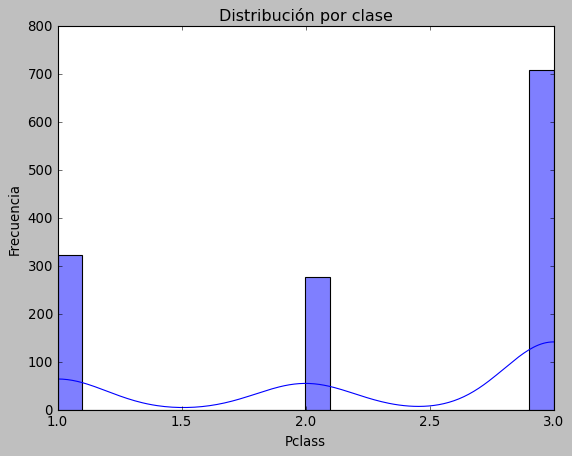

In [34]:
# your code here

# Crear un histograma de la columna 'age' utilizando Seaborn
sns.histplot(data=titanic, x='Pclass', kde=True, bins=20)  # kde=True agrega una estimación de la densidad

# tamaño de la figura

# Personaliza el título y etiquetas de los ejes
plt.title("Distribución por clase")
plt.xlabel("Pclass")
plt.ylabel("Frecuencia")

# Muestra el histograma
plt.show()



#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

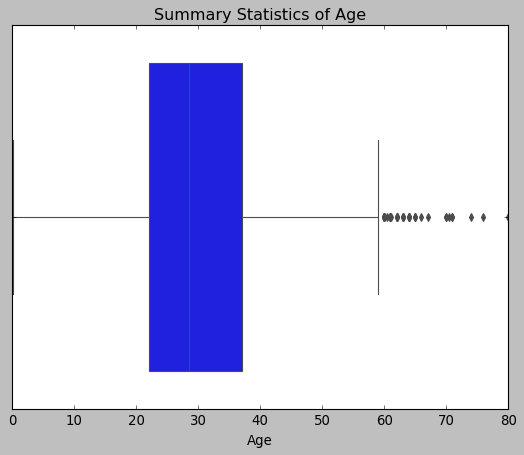

In [35]:
# your code here

# Create a box plot for the "Age" feature
sns.boxplot(x=titanic['Age'])

# Customize the plot labels and title
plt.title("Summary Statistics of Age")
plt.xlabel("Age")

# Show the plot
plt.show()

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

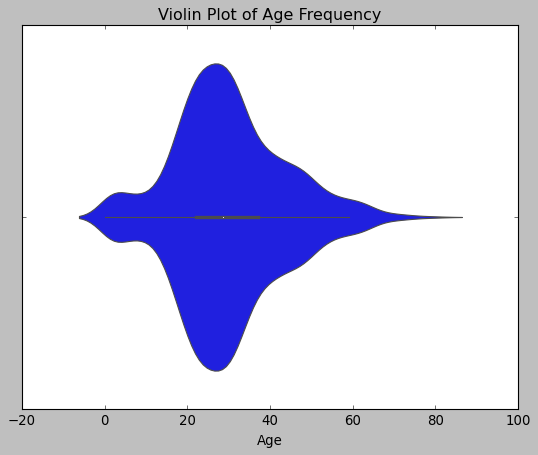

In [36]:
# your code here

# Create a violin plot for the "Age" frequency
sns.violinplot(x=titanic['Age'])

# Customize the plot labels and title
plt.title("Violin Plot of Age Frequency")
plt.xlabel("Age")

# Show the plot
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

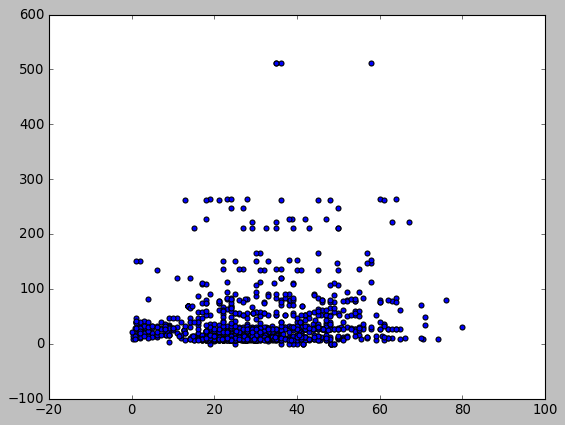

In [38]:
# Method 1 - matplotlib
# your code here

# crear un grafico de dispersion con fare en el eje x y age en el eje y

plt.scatter(titanic['Age'], titanic['Fare'])


<Axes: xlabel='Age', ylabel='Fare'>

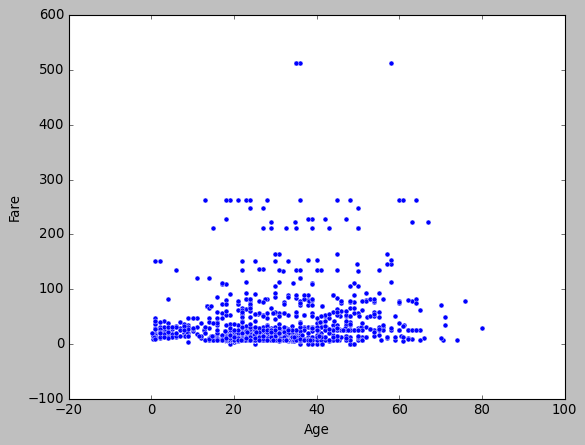

In [39]:
# Method 2 - seaborn
# your code here

# crear un grafico de dispersion con fare en el eje x y age en el eje y

sns.scatterplot(data=titanic, x='Age', y='Fare')

#### Plot the correlation matrix using seaborn.

<Axes: xlabel='Age', ylabel='Fare'>

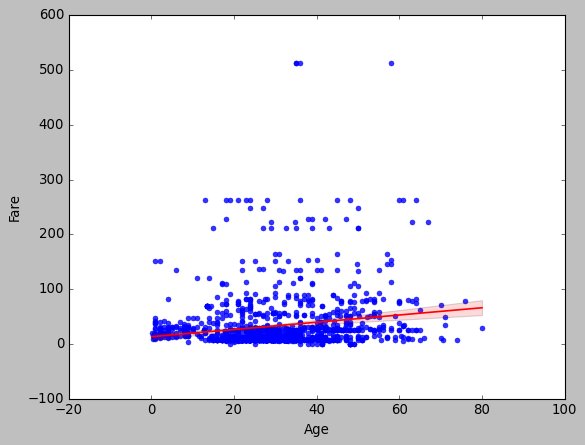

In [42]:
# your code here

# añadir una linea de regresion y que sea de color rojo la linea y los puntos de color azul

sns.regplot(data=titanic, x='Age', y='Fare', color='red', scatter_kws={'color': 'blue'})


#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<Axes: xlabel='Age', ylabel='Count'>

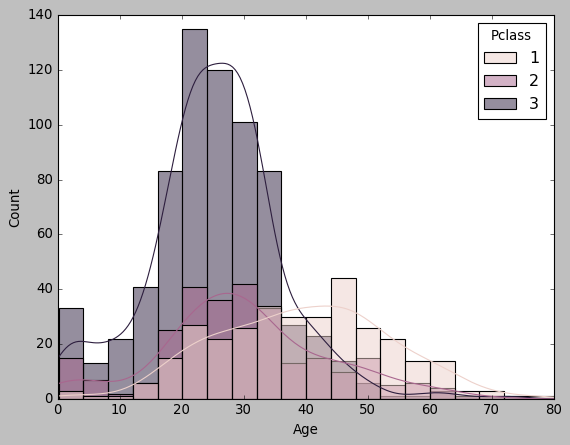

In [43]:
# your code here

# crear un histograma de la columna 'age' que sea dependiente de la columna Pclass

sns.histplot(data=titanic, x='Age', hue='Pclass', kde=True, bins=20)



#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

<Axes: xlabel='Age', ylabel='Count'>

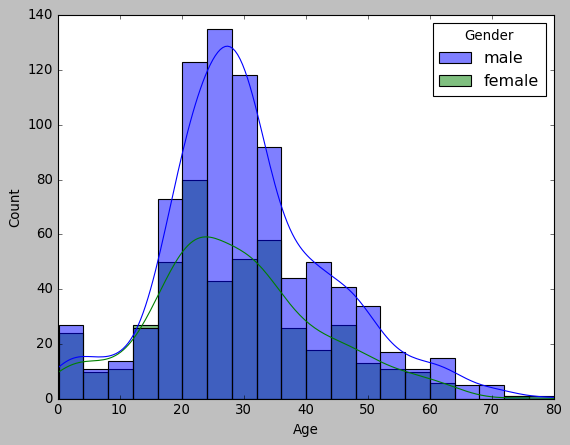

In [44]:
# your code here

# crear un histograma de la columna 'age' que sea dependiente de la columna Gender y que los colores de las barras sean diferentes



sns.histplot(data=titanic, x='Age', hue='Gender', kde=True, bins=20)